
# Matter shell definition

This example demonstrates how matter shells are defined, and their angular power
spectra computed.

The the angular power spectra are saved here, so that they can be reused in
other examples without recomputing.


## Compute
Here we define the shells for these examples, and use CAMB to compute the
angular matter power spectra for the shell definitions.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import camb
import cosmology.compat.camb

# almost all GLASS functionality is available from the `glass` namespace
import glass
import glass.ext.camb

# creating a numpy random number generator for sampling
rng = np.random.default_rng(seed=42)

# cosmology for the simulation
h = 0.7
Oc = 0.25
Ob = 0.05

# basic parameters of the simulation
lmax = 1000

# set up CAMB parameters for matter angular power spectrum
pars = camb.set_params(
    H0=100 * h,
    omch2=Oc * h**2,
    ombh2=Ob * h**2,
    NonLinear=camb.model.NonLinear_both,
)

# get the cosmology from CAMB
cosmo = cosmology.compat.camb.Cosmology.from_camb(pars)

# shells of 200 Mpc in comoving distance spacing
zgrid = glass.distance_grid(cosmo, 0.0, 1.0, dx=200.0)

# triangular radial windows, equivalent to linear interpolation of n(z)
shells = glass.linear_windows(zgrid)

# compute angular matter power spectra with CAMB
cls = glass.ext.camb.matter_cls(pars, lmax, shells)

## Plot
We can do a quick preview of the shell definition.

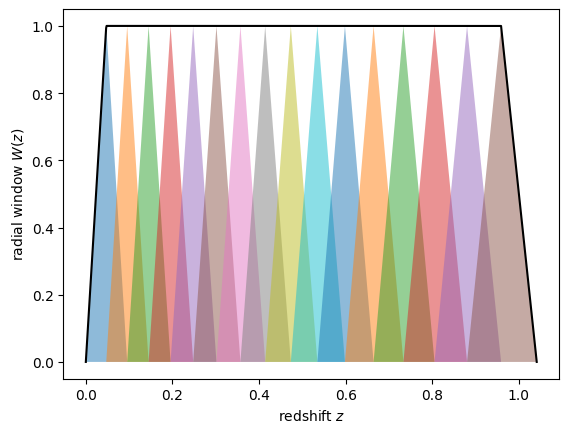

In [ ]:
# plot the individual shells
for shell in shells:
    plt.fill_between(shell.za, np.zeros_like(shell.wa), shell.wa, alpha=0.5)

# plot the total of all shells
all_za = np.linspace(0.0, zgrid[-1], 1000)
all_wa = sum(np.interp(all_za, shell.za, shell.wa) for shell in shells)
plt.plot(all_za, all_wa, "-k")

plt.xlabel("redshift $z$")
plt.ylabel("radial window $W(z)$")
plt.show()